In [2]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from ipywidgets import interactive, Button
from IPython.display import display








#
def planegauss(shape, w = 1/2, h = 1): # function to generate a gaussian across a 2d array, used for gaussian initial condition
    npx = np.linspace( -2, 2, shape[0] )
    npy = np.linspace( -2, 2, shape[1] )
    npxx, npyy = np.meshgrid(npx, npy)
    h = h*np.exp( -np.e * ( npxx*npxx + npyy*npyy ) / (w*w) )
    return (h)










#

In [3]:
#



dx, dy = 100, 100 # meters
sizex = 500 # size of grid for simulation in dx or dy
sizey = 500
# k = 0.01 # porportion of differential equation
g = 9.81

#initial condition constants
# initcon = {}
H = 100*np.ones((sizex, sizey))
N = np.zeros((sizex, sizey)) # gloabal height array
N = 1*planegauss((sizex, sizey), 2, 1) # intial condition
U = np.zeros((sizex, sizey)) # global x vel array
V = np.zeros((sizex, sizey)) # global y vel array

#globaly used height and velocity variables
# H = np.array(initcon['H'])
# N = np.array(initcon['N'])
# U = np.array(initcon['U'])
# V = np.array(initcon['V'])




    





#

In [4]:
#



# useful math functions

def partial(a, ax):
    partial = ( np.roll(a, -1, ax) - np.roll(a, 1, ax) ) / (2*(dx, dy)[ax]) # f(x+dx) - f(x) / dx
    return (partial)
def d_dx(a):
    d_dx = -partial(a, 0)
    d_dx[0] = d_dx[1] # first row is roll-over nonsense
    return d_dx
def d_dy(a):
    d_dy = -partial(a, 1)
    d_dy[:,0] = d_dy[:,1] # first collumn is roll-over nonsense
    return d_dy
def div(u, v):
    div = (np.roll(d_dx(u), 1, 0)+np.roll(d_dy(v), 1, 1))
    return div







#

In [5]:
#


def timestep(h, n, u, v, dt): # step one iteration into the future
    n = n - ( d_dx((h+n)*u) + d_dy((h+n)*v) )*dt #        dn/dt = -div((n+h)u,(n+h)v])
    u = u - ( g*d_dx(n) )*dt  #                   du/dt = -g*dn/dx              u*d_dx(u)+v*d_dy(u)+
    v = v - ( g*d_dy(n) )*dt  #                   dv/dt = -g*dn/dy
    return n, u, v








#

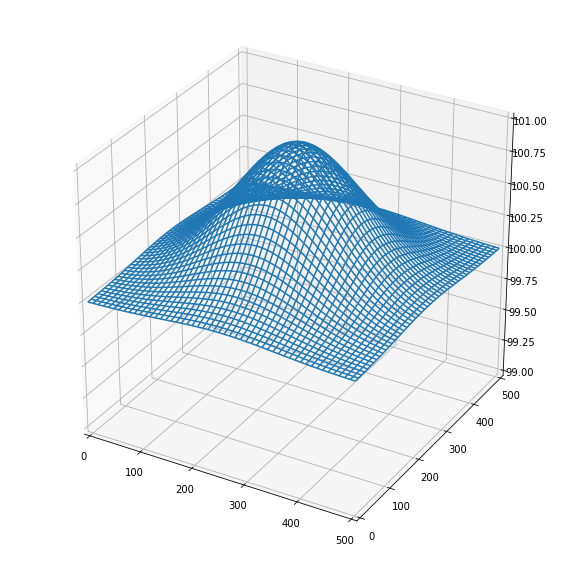

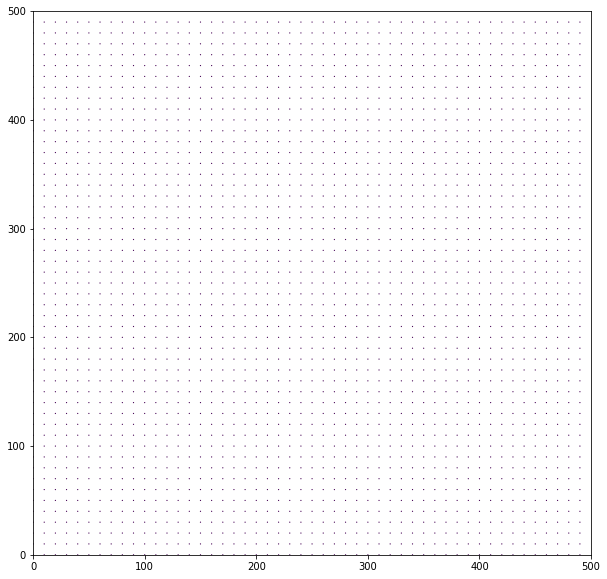

In [6]:
#




# display stuff

def dispimg(a):
    imgplot = plt.imshow(a, 'Oranges')
    plt.colorbar()
    # plt.savefig('h')

def disp3d(a, xlim, ylim, zlim, fsize = (10, 10), ires = (10, 10)):
    fig = plt.figure(figsize=fsize)
    ax = fig.add_subplot(111, projection='3d')
    x = y = np.arange(len(a))
    xx, yy = np.meshgrid(x, y)
    # Plot wireframe.
    ax.plot_wireframe(xx, yy, a, rstride=int(ires[0]), cstride=int(ires[1]))
    
    ax = plt.gca()
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_zlim(zlim)
    
    plt.show()

def vect(u, v, xlim, ylim, size = (10, 10), arwspar = (1, 1), arwsz = 1):
    arwspar = (int(arwspar[0]), int(arwspar[1]))
    fig, ax = plt.subplots(figsize=size)
    xx, yy = np.meshgrid(np.arange(u.shape[0]), np.arange(u.shape[1]))
    xxsp = xx[::arwspar[0],::arwspar[1]]
    yysp = yy[::arwspar[0],::arwspar[1]]
    usp = u[::arwspar[0],::arwspar[1]]
    vsp = v[::arwspar[0],::arwspar[1]]
    m = np.hypot(usp, vsp)
    ax.quiver(xxsp, yysp, vsp, usp, m, scale = 1/arwsz)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.show()
    

    
    
    
    
    
    
    
    
#display initial conditions
disp3d(N+H, [0, sizex], [0, sizey], [99, 101], (10, 10), (sizex/50, sizey/50))
vect(U, V, [0, sizex], [0, sizey], (10, 10), (sizex/50, sizey/50), 1)









#

In [7]:
#



#time


# displays resulting water height after time t
def simulate(h, n, u, v, t, dt = 1):
    # reset to initial conditions



    # dont try if timstep is zero
    if (dt == 0):
        return False
    
    # iterate t times with interval size dt
    itr = 0
    while (itr < t):
#         NL = np.array(N)
#         UL = np.array(U)
#         VL = np.array(V)
        n, u, v = timestep(h, n, u, v, dt) # pushes N, U, V one step into the future
#         a = np.abs(U-UL)
#         ii = np.unravel_index(np.argmax(a, axis=None), a.shape) 
#         print(itr/dt,np.max((N-NL)),(U-UL)[ii],np.max(np.abs(V-VL)))
#         a = np.abs(U)
#         jj = np.unravel_index(np.argmax(a, axis=None), a.shape) 
#         print(itr,np.max(N),U[ii],np.max(np.abs(V)))
        itr += dt
    
    
    return n, u ,v
    
    
    
def rendersim(t, dt):
    
    # run simulation with initial condition inputs and t seconds
    n, u, v = simulate(H, N, U, V, t, dt)
    h = H
    
    print('integral dxdy: ')
    print(np.sum(h+n))
    print('total divergence: ')
    print(np.sum(div(u, v)))
    
    # display water height
    disp3d(h+n, [0, sizex], [0, sizey], [99, 101], (16, 16), (sizex/80, sizey/80))
    
    # display vector feild of velocity
    vect(u, v, [0, sizex], [0, sizey], (16, 16), (50, 50), 1)







# interact with time
controls = interactive(rendersim, # runs simulate() on initial conditions
                       {'manual' : True, 'manual_name' : 'run simulation'}, # dont run until I say so
                       t = (0, 1000, 1), # time elapsed
                       dt = (0.1, 2, 0.01) # time interval
                       )
display(controls)








#

interactive(children=(IntSlider(value=500, description='t', max=1000), FloatSlider(value=1.05, description='dt…